<a href="https://colab.research.google.com/github/Walbyq/binary-and-morphology/blob/main/binary_and_morphology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Убедимся, что необходимые зависимости установлены
# !apt-get update && apt-get install -y libgl1-mesa-glx

In [8]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [9]:
from google.colab import drive
drive.mount('/content/drive')

DIR_PATH = '/content/drive/MyDrive/data/imgs_for_binarization'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Задача 1. Бинаризация изображения
1. Откройте изображение "Butterfly-PNG-Transparent-Photo.png"
2. Преобразуйте его в серый цвет
3. Преобразуйте серое изображение в бинарное с помощью функции threshold библиотеки cv2.
Данная функция принимает следующие аргументы:
    - изображение;
    - пороговое значение;
    - максимальное значение, которое присваивается пикселям, превышающим пороговое;
    - тип порогового значения (cv.THRESH_BINARY, cv.THRESH_BINARY_INV, cv.THRESH_TRUNC, cv.THRESH_TOZERO, cv.THRESH_TOZERO_INV).
    
Функция возвращает два параметра: используемый порог и пороговое изображение.

4. Преобразуйте серое изображение в бинарное с помощью функции threshold библиотеки cv2 с применением метода Отцу для поиска оптимального порогового значения. Для этого в 4 параметр функции threshold добавьте cv.THRESH_OTSU (Например: cv.THRESH_BINARY+cv.THRESH_OTSU)

5. Посмотрите и сравните полученные изображения
6. Примените к любому из изображений операцию Эрозию -- морфологическая операция, которая вычисляет локальный минимум по площади ядра. Для этого используйте функцию erode библиотеки cv2. Входящие параметры:
    - изображение (после бинаризации);
    - ядро (для примера, можете взять в качестве ядра матрицу 5 на 5 заполненную единицами);
    - можете задать количество итераций через параметр iterations.
7. Примените к любому из изображений операцию дилатации -- морфологическая операция, которая состоит из свертки изображения с некоторым ядром любой формы или размера. Для этого используйте функцию dilate библиотеки cv2. Входящие параметры:
    - изображение (после бинаризации);
    - ядро (для примера, можете взять в качестве ядра матрицу 5 на 5 заполненную единицами);
    - можете задать количество итераций через параметр iterations.

In [10]:
# Загрузка изображения
image_path_butteffly = os.path.join(DIR_PATH, 'Butterfly-PNG-Transparent-Photo.png')
image_butterfly_bgr = cv2.imread(image_path_butteffly)
image_butterfly = cv2.cvtColor(image_butterfly_bgr, cv2.COLOR_BGR2RGB)

In [11]:
# Преобразование в серый цвет
gray_image_butterfly = cv2.cvtColor(image_butterfly, cv2.COLOR_BGR2GRAY)

In [12]:
# Бинаризация с помощью метода Отцу
_, binary_image_butterfly = cv2.threshold(gray_image_butterfly, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

In [13]:
# Создание ядра для эрозии
kernel = np.ones((5, 5), np.uint8)

# Эрозия
eroded_image_butterfly = cv2.erode(binary_image_butterfly, kernel, iterations=1)

In [14]:
# Дилатация
dilated_image_butterfly = cv2.dilate(eroded_image_butterfly, kernel, iterations=1)

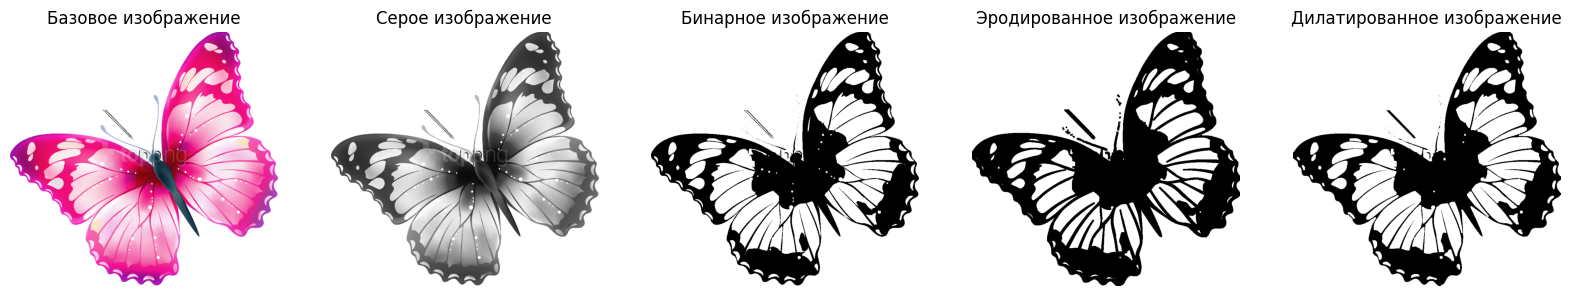

In [15]:
# Список изображений и их названий
images_butterfly = [
    (image_butterfly, 'Базовое изображение', None),
    (gray_image_butterfly, 'Серое изображение', 'gray'),
    (binary_image_butterfly, 'Бинарное изображение', 'gray'),
    (eroded_image_butterfly, 'Эродированное изображение', 'gray'),
    (dilated_image_butterfly, 'Дилатированное изображение', 'gray')
]

# Отображение изображений
plt.figure(figsize=(20, 5))

for i, (image, title, cmap) in enumerate(images_butterfly):
    plt.subplot(1, len(images_butterfly), i + 1)
    if cmap is None:
        plt.imshow(image)
    else:
        plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis('off')

plt.show()

# Задача 2. Определение контуров с помощью оператора Соболя

1. Прочитайте изображение из файла 1200px-Lenna.png
2. Преобразуйте его в серый цвет
3. Отфильтруйте серое изображение с помощью Гауссовского фильтра (Например, функция GaussianBlur библиотеки cv2)
4. Выделите контуры изображения с помощью оператора Соболя. Оператор Соболя - это оператор дискретного дифференцирования. Он вычисляет приближение градиента функции интенсивности изображение и объединяет гауссово сглаживание и дифференцирование. Для этого используем функцию Sobel библиотеки cv2:
    - применяем оператор Соболя по dx. В качестве глубины выходного изображения берём константы cv2.CV_64F.
    - сохраняем модуль полученного результата в типе np.uint8
    - применяем оператор Соболя по dy. В качестве глубины выходного изображения берём константы cv2.CV_64F.
    - сохраняем модуль полученного результата в типе np.uint8
5. Контур изображения получится в результате суммы оператора Соболя по dx и dy

In [16]:
# Загрузка изображения
image_path_lenna = os.path.join(DIR_PATH, '1200px-Lenna.png')
image_lenna_bgr = cv2.imread(image_path_lenna)
image_lenna = cv2.cvtColor(image_lenna_bgr, cv2.COLOR_BGR2RGB)

In [17]:
# Преобразование в серый цвет
gray_image_lenna = cv2.cvtColor(image_lenna, cv2.COLOR_BGR2GRAY)

In [18]:
# Применение Гауссовского фильтра
blurred_image_lenna = cv2.GaussianBlur(gray_image_lenna, (15, 15), 0)

In [19]:
# Применение оператора Соболя по dx
grad_x = cv2.Sobel(blurred_image_lenna, cv2.CV_64F, 1, 0, ksize=3)
abs_grad_x = np.abs(grad_x).astype(np.uint8)

# Применение оператора Соболя по dy
grad_y = cv2.Sobel(blurred_image_lenna, cv2.CV_64F, 0, 1, ksize=3)
abs_grad_y = np.abs(grad_y).astype(np.uint8)

# Сумма градиентов для получения контура
contour_image_lenna = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

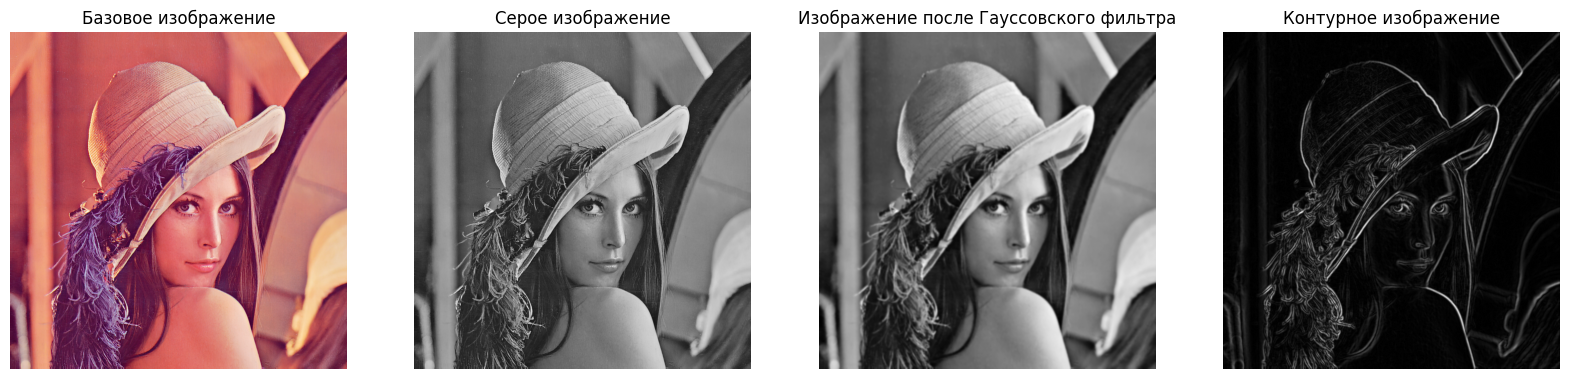

In [20]:
# Список изображений и их названий
images_lenna = [
    (image_lenna, 'Базовое изображение', None),
    (gray_image_lenna, 'Серое изображение', 'gray'),
    (blurred_image_lenna, 'Изображение после Гауссовского фильтра', 'gray'),
    (contour_image_lenna, 'Контурное изображение', 'gray')
]

# Отображение изображений
plt.figure(figsize=(20, 5))

for i, (image, title, cmap) in enumerate(images_lenna):
    plt.subplot(1, len(images_lenna), i + 1)
    if cmap is None:
        plt.imshow(image)
    else:
        plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis('off')

plt.show()

# Задача 3. Определение контура с помощью оператора Canny

1. Прочитайте изображение из файла "finger.jpg"
2. Преобразуйте изображение в серый цвет
3. Отфильтруйте серое изображение с помощью Гауссовского фильтра (Например, функция GaussianBlur библиотеки cv2)
4. Найдите пороговое значение методом треугольника (с помощью функции threshold c типом порогового значения cv2.THRESH_TRIANGLE)
5. Найдите пороговое значение методом Отцу (с помощью функции threshold c типом порогового значения cv2.THRESH_OTSU)
6. Найдите пороговое значение как медианное значение изображения после Гауссовского фильтра.
7. Выделите контуры с помощью оператора Canny для всех пороговых значений, найденных ранее. Для этого используйте функцию Canny библиотеки cv2.
8. Сравните полученные результаты.

In [54]:
# Загрузка изображения
image_path_finger = os.path.join(DIR_PATH, 'finger.jpg')
image_finger_bgr = cv2.imread(image_path_finger)
image_finger = cv2.cvtColor(image_finger_bgr, cv2.COLOR_BGR2RGB)

In [55]:
# Преобразование в серый цвет
gray_image_finger = cv2.cvtColor(image_finger, cv2.COLOR_BGR2GRAY)

In [64]:
# Применение Гауссовского фильтра
blurred_image_finger = cv2.GaussianBlur(gray_image_finger, (7, 7), 0)

In [65]:
# Находка порогового значения методом треугольника
_, thresh_triangle = cv2.threshold(blurred_image_finger, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_TRIANGLE)

# Находка порогового значения методом Отцу
_, thresh_otsu = cv2.threshold(blurred_image_finger, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Находка порогового значения как медианное значение
median_value = np.median(blurred_image_finger)
_, thresh_median = cv2.threshold(blurred_image_finger, median_value, 255, cv2.THRESH_BINARY)

# Выделение контуров с помощью оператора Canny
canny_triangle = cv2.Canny(thresh_triangle, 100, 200)
canny_otsu = cv2.Canny(thresh_otsu, 100, 200)
canny_median = cv2.Canny(thresh_median, 100, 200)

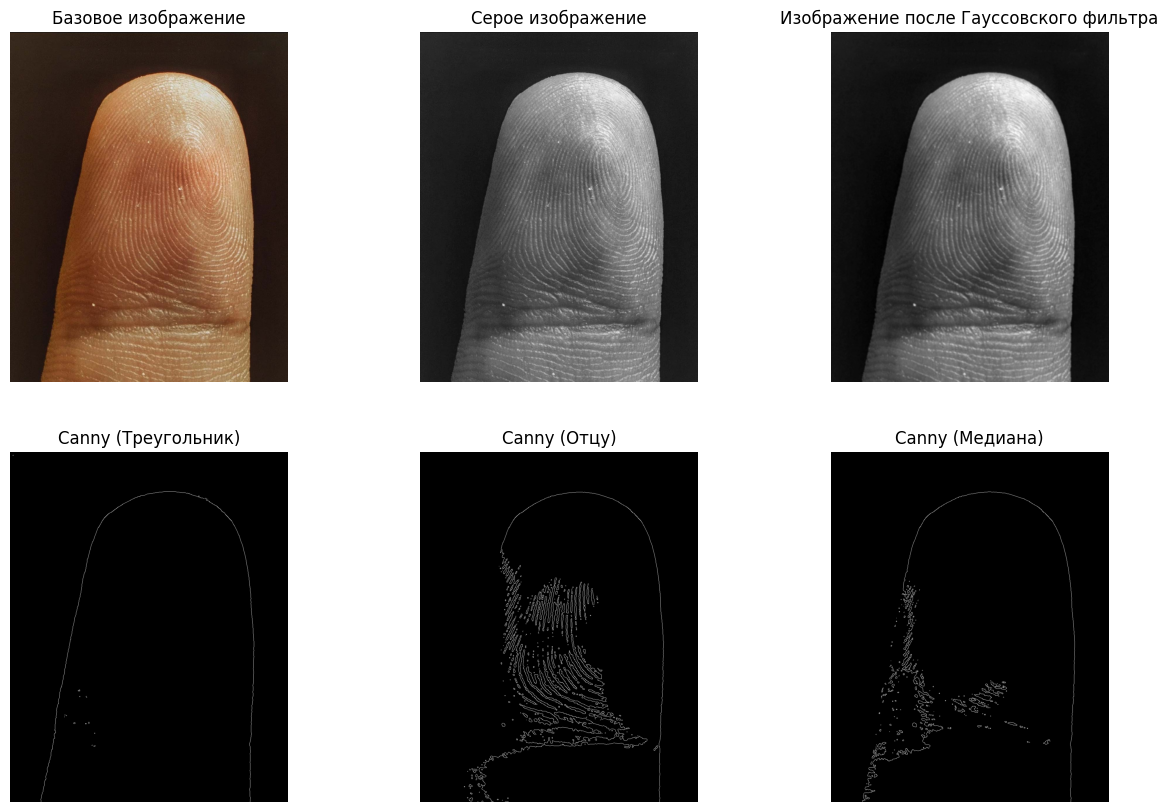

In [66]:
# Список изображений и их названий
images_finger = [
    (image_finger, 'Базовое изображение', None),
    (gray_image_finger, 'Серое изображение', 'gray'),
    (blurred_image_finger, 'Изображение после Гауссовского фильтра', 'gray'),
    (canny_triangle, 'Canny (Треугольник)', 'gray'),
    (canny_otsu, 'Canny (Отцу)', 'gray'),
    (canny_median, 'Canny (Медиана)', 'gray')
]

# Отображение изображений
plt.figure(figsize=(15, 10))

for i, (image, title, cmap) in enumerate(images_finger):
    plt.subplot(2, int(len(images_finger)/2), i + 1)
    if cmap is None:
        plt.imshow(image)
    else:
        plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis('off')

plt.show()